# Temperature project : target-Next_Tmax

Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING THE DATA ROWS AND COLUMNS

In [2]:
df=pd.read_csv("temperature.csv")

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.shape

(7752, 25)

data consistin 7752 rowa and 25 columns


In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

25 different columns are there, station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'are the column names

In [8]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

datas are in float format, only date column is in object format

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

null values are there in almost all columns,we want to treat that

<AxesSubplot:>

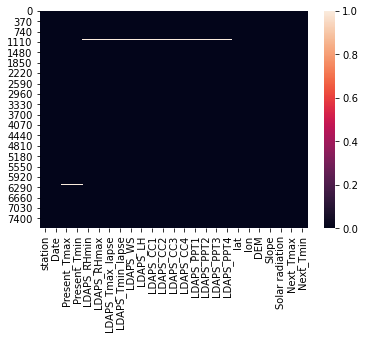

In [10]:
sns.heatmap(df.isnull())

we want to treat null later

# EDA

# ANALYSING TARGET

In [11]:
df['Next_Tmax']

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

In [12]:
df['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

target contains contineous valus so we have to consider a regression model

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# distribution plot

<AxesSubplot:xlabel='station', ylabel='Density'>

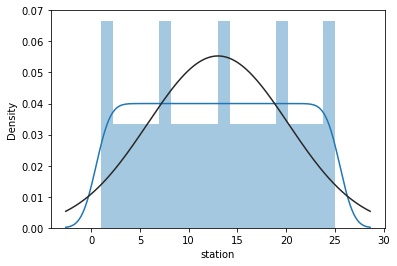

In [13]:
sns.distplot(df['station'],fit=norm)

station values are not distributed normally

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

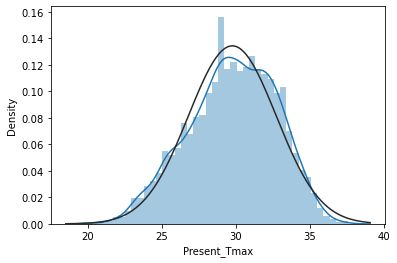

In [14]:
sns.distplot(df['Present_Tmax'],fit=norm)

Present_Tmax is almost distributed normally and some peaks are there

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

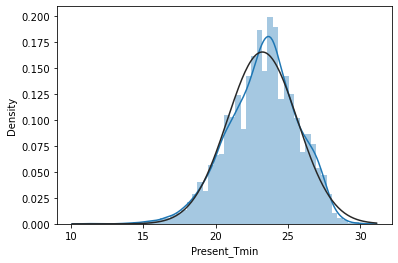

In [15]:
sns.distplot(df['Present_Tmin'],fit=norm)

Present_Tmin values are distributed in a nomal way

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

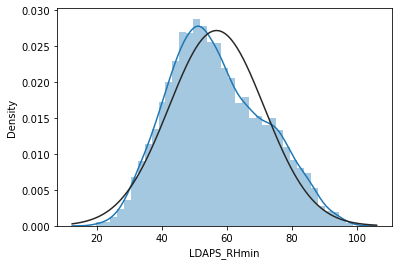

In [16]:
sns.distplot(df['LDAPS_RHmin'],fit=norm)

LDAPS_RHmin values are distributed almost normally

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

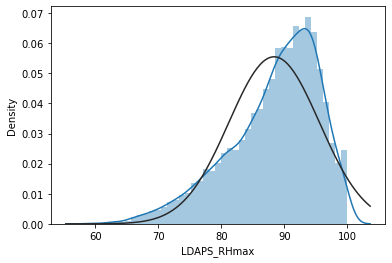

In [17]:
sns.distplot(df['LDAPS_RHmax'],fit=norm)

LDAPS_RHmax values are distributed normally but skewness presence is there

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

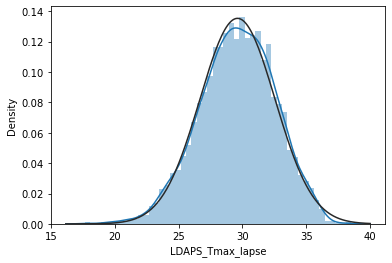

In [18]:
sns.distplot(df['LDAPS_Tmax_lapse'],fit=norm)

LDMPS_Tmin 1apse is normally distributed

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

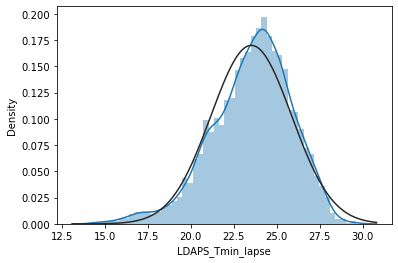

In [19]:
sns.distplot(df['LDAPS_Tmin_lapse'],fit=norm)

LDAPS_Tmin_lapse are normally distributed

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

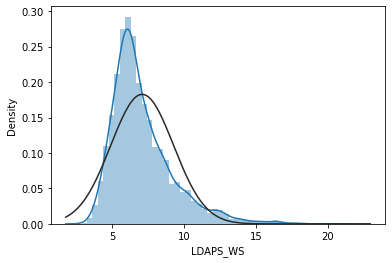

In [20]:
sns.distplot(df['LDAPS_WS'],fit=norm)

'LDAPS_ws has skewness presence in the plot

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

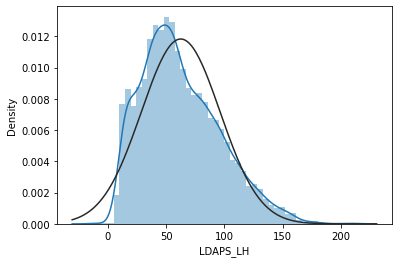

In [21]:
sns.distplot(df['LDAPS_LH'],fit=norm)

LDAPS_LH is distributed almost normally 

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

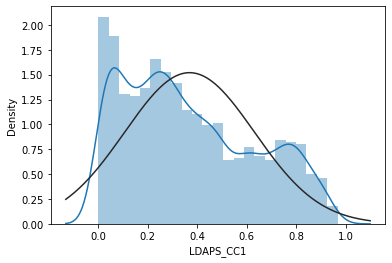

In [22]:
sns.distplot(df['LDAPS_CC1'],fit=norm)

LDAPS_CCI is not distributed normally

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

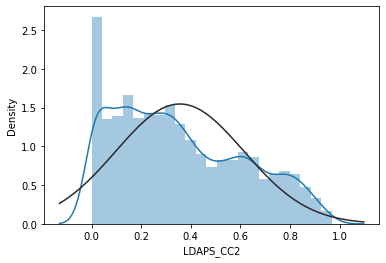

In [23]:
sns.distplot(df['LDAPS_CC2'],fit=norm)

LDAPS_CC2 have clear skewness presence

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

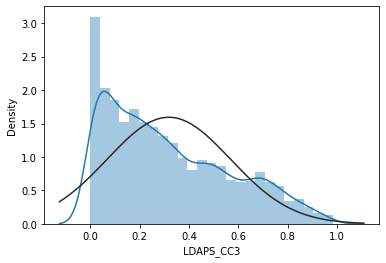

In [24]:
sns.distplot(df['LDAPS_CC3'],fit=norm)

LDAPS_CC3 has skewness presemce

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

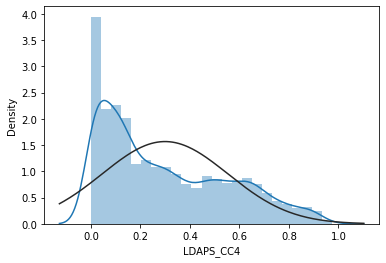

In [25]:
sns.distplot(df['LDAPS_CC4'],fit=norm)

LDAPS_CC4 has clear skewness in the plot

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

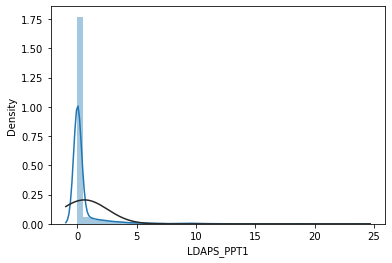

In [26]:
sns.distplot(df['LDAPS_PPT1'],fit=norm)

LDAPS_PPT1 has skewness presece

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

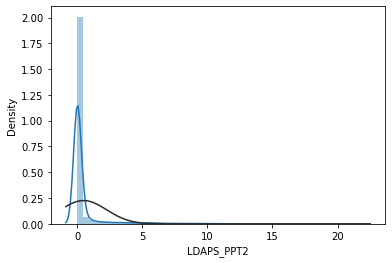

In [27]:
sns.distplot(df['LDAPS_PPT2'],fit=norm)

LDAPS_PPT2 also not mormally distributed and skewness is there

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

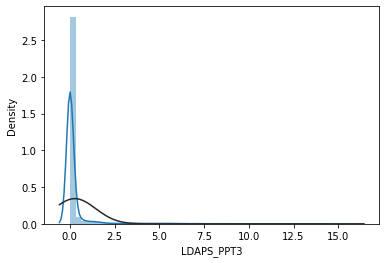

In [28]:
sns.distplot(df['LDAPS_PPT3'],fit=norm)

LDAPS_PPT3 is not distributed normally and skewness is there

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

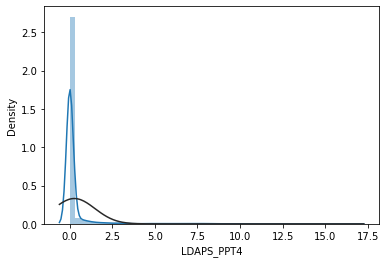

In [29]:
sns.distplot(df['LDAPS_PPT4'],fit=norm)

LDAPS_PPT4 plot shows clear skewness presence 

<AxesSubplot:xlabel='lat', ylabel='Density'>

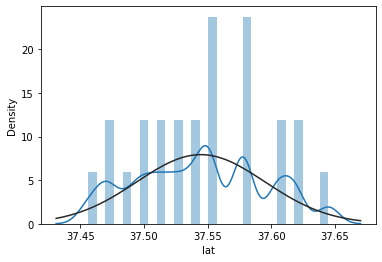

In [30]:
sns.distplot(df['lat'],fit=norm)

lat is not distributed normally peak values are all over there

<AxesSubplot:xlabel='lon', ylabel='Density'>

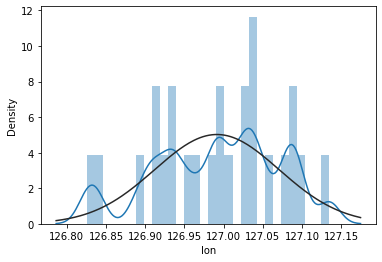

In [31]:
sns.distplot(df['lon'],fit=norm)

lon is also not normally distributed

<AxesSubplot:xlabel='DEM', ylabel='Density'>

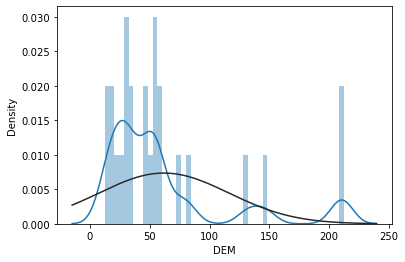

In [32]:
sns.distplot(df['DEM'],fit=norm)

DEM is not distributed normally,skewness is there

<AxesSubplot:xlabel='Slope', ylabel='Density'>

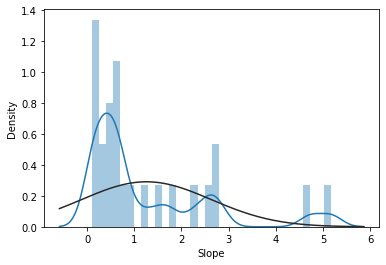

In [33]:
sns.distplot(df['Slope'],fit=norm)

Slope has clear skewness in the plot

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

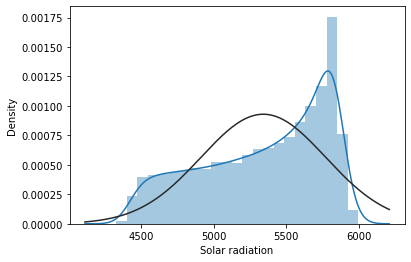

In [34]:
sns.distplot(df['Solar radiation'],fit=norm)

solar radiation data has skewness and not normally distributed

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

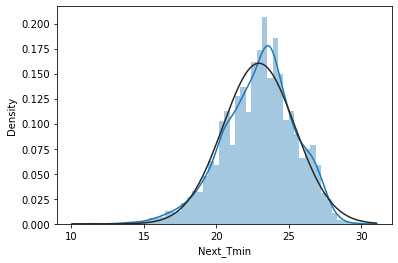

In [35]:
sns.distplot(df['Next_Tmin'],fit=norm)

Next_Tmin values are almost distributrd normally

# BI_VARIATE ANALYSIS

<AxesSubplot:title={'center':'comparison of Present_Tmax AND Solar radiation'}, xlabel='Present_Tmax', ylabel='Solar radiation'>

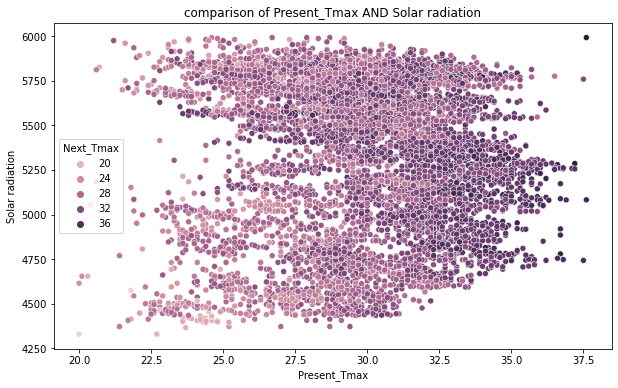

In [36]:
plt.figure(figsize=[10,6])
plt.title('comparison of Present_Tmax AND Solar radiation')
sns.scatterplot(df['Present_Tmax'],df['Solar radiation'],hue=df['Next_Tmax'])

next tmax is cleraley depending on present t max value ,more over solar radiation depending temp values

<AxesSubplot:title={'center':'comparison of Present_Tmax  AND Next_Tmax'}, xlabel='Present_Tmax', ylabel='Next_Tmax'>

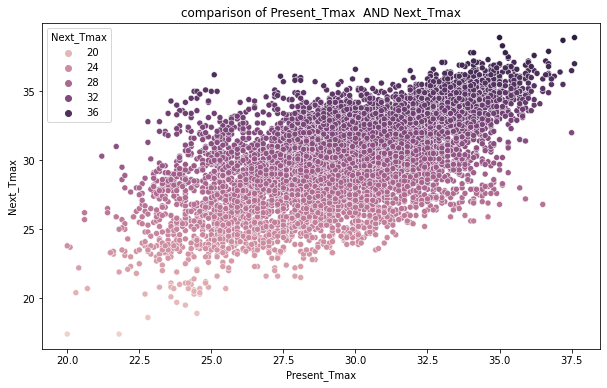

In [37]:
plt.figure(figsize=[10,6])
plt.title('comparison of Present_Tmax  AND Next_Tmax')
sns.scatterplot(df['Present_Tmax'],df['Next_Tmax'],hue=df['Next_Tmax'])

present tmax and next tmax have linear relation each other

<AxesSubplot:title={'center':'comparison of Present_Tmax AND LDAPS_Tmax_lapse'}, xlabel='Present_Tmax', ylabel='LDAPS_Tmax_lapse'>

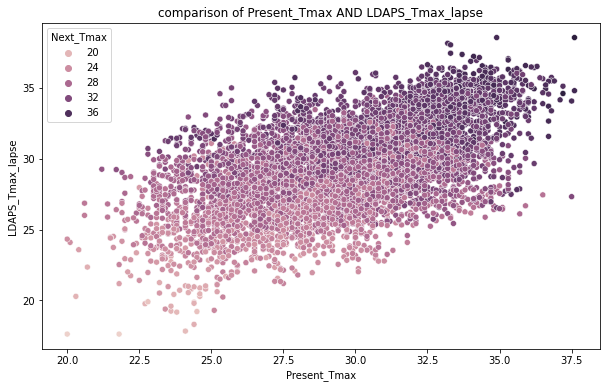

In [38]:
plt.figure(figsize=[10,6])
plt.title('comparison of Present_Tmax AND LDAPS_Tmax_lapse')
sns.scatterplot(df['Present_Tmax'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax'])

present tmax and LDAPS_Tmax_lapse also has linear relation to each other

<AxesSubplot:title={'center':'comparison of lat  AND lon'}, xlabel='lat', ylabel='lon'>

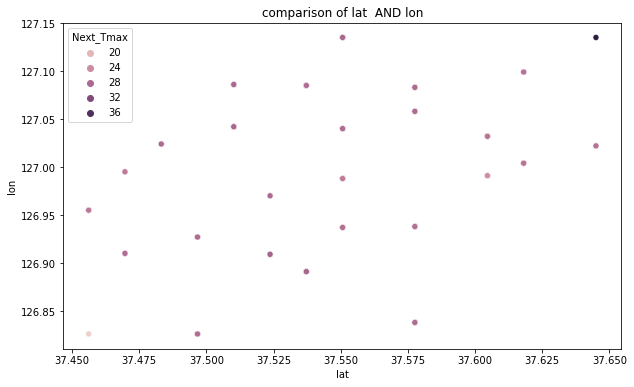

In [39]:
plt.figure(figsize=[10,6])
plt.title('comparison of lat  AND lon')
sns.scatterplot(df['lat'],df['lon'],hue=df['Next_Tmax'])

lat and lon are relating each other and temperature value is depending position of particular area

<AxesSubplot:title={'center':'comparison of station AND Present_Tmax'}, xlabel='station', ylabel='Present_Tmax'>

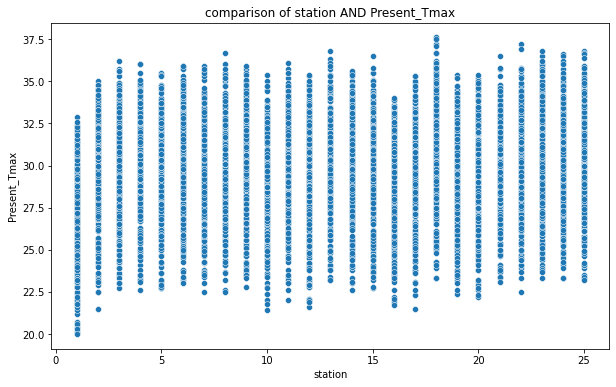

In [40]:
plt.figure(figsize=[10,6])
plt.title('comparison of station AND Present_Tmax')
sns.scatterplot(df['station'],df['Present_Tmax'])

without depending station tmax values are present all over the each stations

<AxesSubplot:title={'center':'comparison of Solar radiation AND Next_Tmax'}, xlabel='Solar radiation', ylabel='Next_Tmax'>

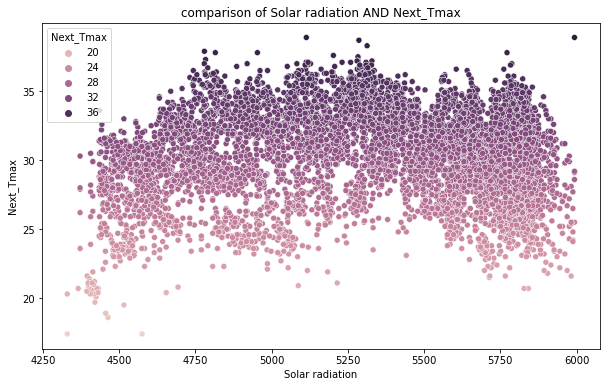

In [41]:
plt.figure(figsize=[10,6])
plt.title('comparison of Solar radiation AND Next_Tmax')
sns.scatterplot(df['Solar radiation'],df['Next_Tmax'],hue=df['Next_Tmax'])

solar radiation is linearily propotionate to temperature value

<AxesSubplot:title={'center':'comparison of LDAPS_RHmax AND LDAPS_Tmax_lapse'}, xlabel='LDAPS_RHmax', ylabel='LDAPS_Tmax_lapse'>

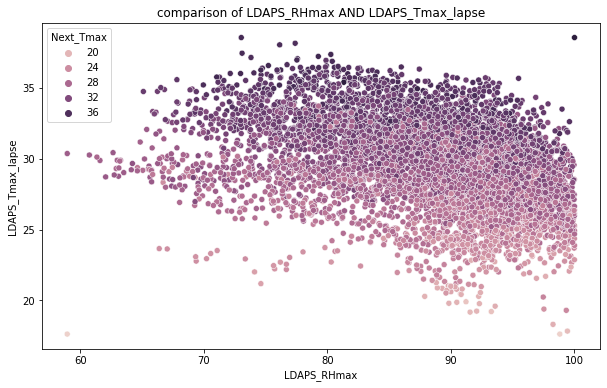

In [42]:
plt.figure(figsize=[10,6])
plt.title('comparison of LDAPS_RHmax AND LDAPS_Tmax_lapse')
sns.scatterplot(df['LDAPS_RHmax'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax'])

BOTH HAVE LINEAR RELATION NEXT TMAX HIGH VALUES ARE ACCUMULATED IN LDAPS RHMAX AND LDAPS LAPSE HIGH VALUES

<AxesSubplot:title={'center':'comparison of Present_Tmax AND LDAPS_PPT3'}, xlabel='Present_Tmax', ylabel='LDAPS_PPT3'>

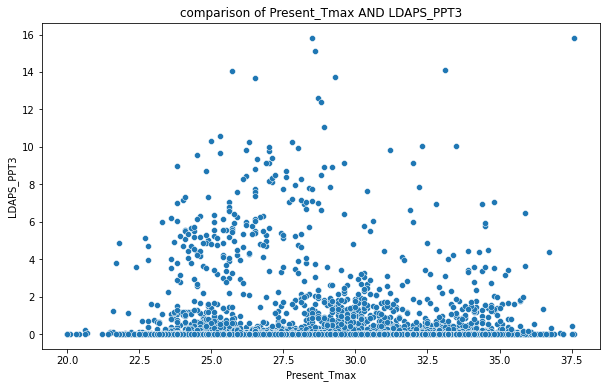

In [43]:
plt.figure(figsize=[10,6])
plt.title('comparison of Present_Tmax AND LDAPS_PPT3')
sns.scatterplot(df['Present_Tmax'],df['LDAPS_PPT3'])

plot shows the relation of present tmax and LDAPS_PPT3

<AxesSubplot:title={'center':'comparison of lat AND lon'}, xlabel='lat', ylabel='lon'>

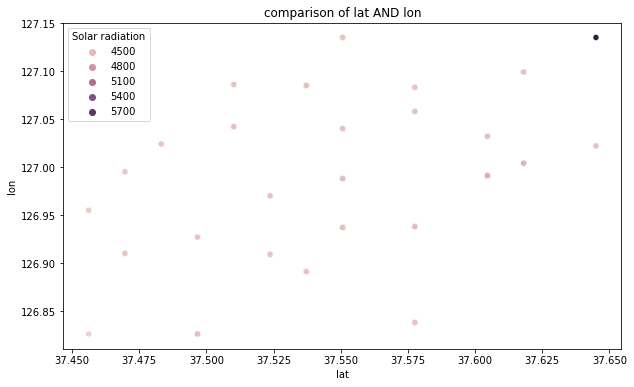

In [44]:
plt.figure(figsize=[10,6])
plt.title('comparison of lat AND lon')
sns.scatterplot(df['lat'],df['lon'],hue=df['Solar radiation'])

solar radiation is surely depending lon and lat

# CHECKING OUTLIERS

<AxesSubplot:xlabel='station'>

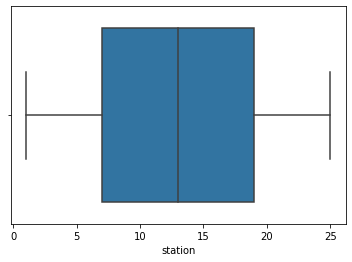

In [45]:
sns.boxplot(df['station'])

station data has no outlier

<AxesSubplot:xlabel='Present_Tmax'>

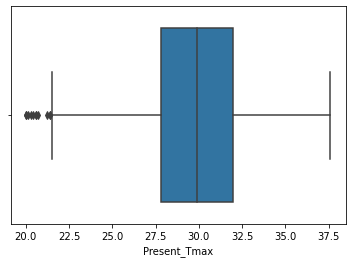

In [46]:
sns.boxplot(df['Present_Tmax'])

column has small outlier presence

<AxesSubplot:xlabel='Present_Tmin'>

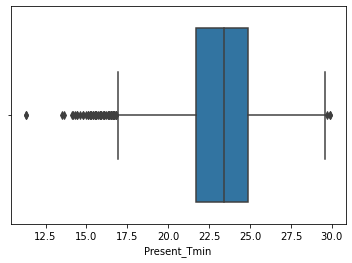

In [47]:
sns.boxplot(df['Present_Tmin'])

present-tmin has outliers 

<AxesSubplot:xlabel='LDAPS_RHmin'>

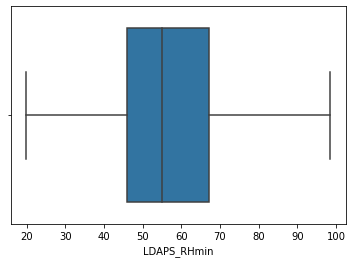

In [48]:
sns.boxplot(df['LDAPS_RHmin'])

LDAPS_RHmin has no outlier presence in the plot

<AxesSubplot:xlabel='LDAPS_RHmax'>

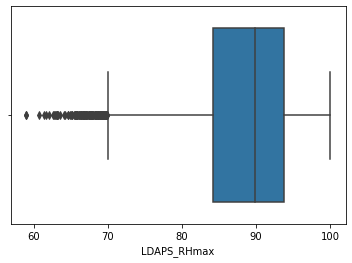

In [49]:
sns.boxplot(df['LDAPS_RHmax'])

LDAPS_RHmax has outliers

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

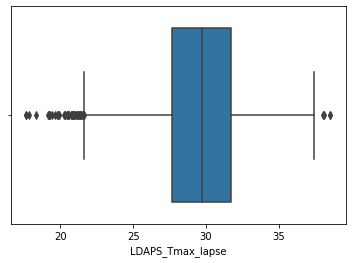

In [50]:
sns.boxplot(df['LDAPS_Tmax_lapse'])

LDAPS_Tmax_lapse has outliers in data

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

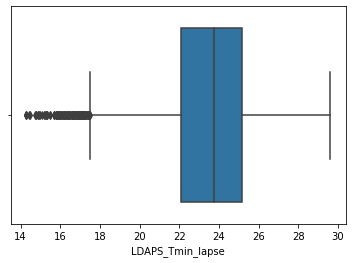

In [51]:
sns.boxplot(df['LDAPS_Tmin_lapse'])

'LDAPS_Tmin_lapse has outliers

<AxesSubplot:xlabel='LDAPS_WS'>

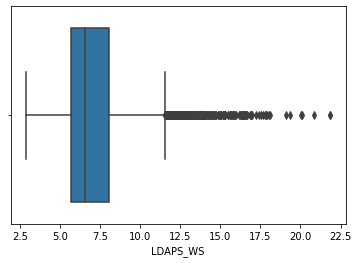

In [52]:
sns.boxplot(df['LDAPS_WS'])

LDAPS_WS has outliers in data

<AxesSubplot:xlabel='LDAPS_LH'>

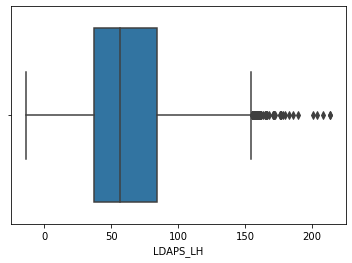

In [53]:
sns.boxplot(df['LDAPS_LH'])

LDAPS_LH has outliers in the data

<AxesSubplot:xlabel='LDAPS_CC1'>

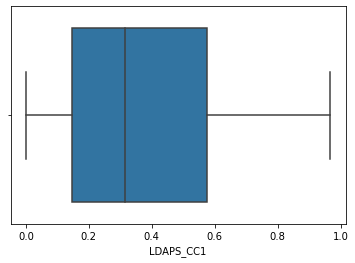

In [54]:
sns.boxplot(df['LDAPS_CC1'])

In [ ]:
LDAPS_CC1 has no outlier presence in thr data

<AxesSubplot:xlabel='LDAPS_CC2'>

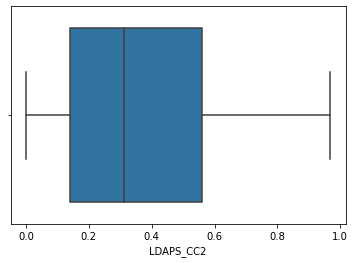

In [55]:
sns.boxplot(df['LDAPS_CC2'])

LDAPS_CC2 has outliers in the data

<AxesSubplot:xlabel='LDAPS_CC3'>

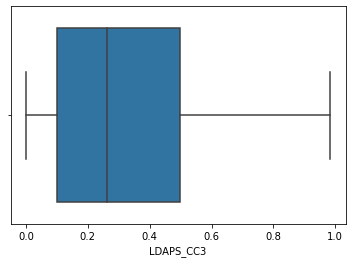

In [56]:
sns.boxplot(df['LDAPS_CC3'])

LDAPS_CC3 plot shows no outliers

<AxesSubplot:xlabel='LDAPS_CC4'>

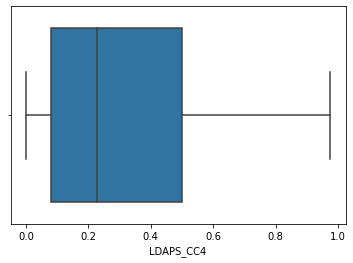

In [57]:
sns.boxplot(df['LDAPS_CC4'])

LDAPS_CC4 has no outliers 

<AxesSubplot:xlabel='LDAPS_PPT1'>

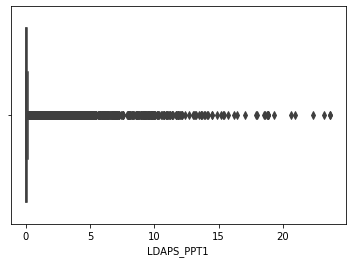

In [58]:
sns.boxplot(df['LDAPS_PPT1'])

LDAPS_PPT1 has large amount of outliers in the data

<AxesSubplot:xlabel='LDAPS_PPT2'>

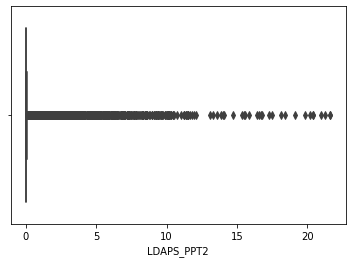

In [59]:
sns.boxplot(df['LDAPS_PPT2'])

LDAPS_PPT2 has outliers in data

<AxesSubplot:xlabel='LDAPS_PPT3'>

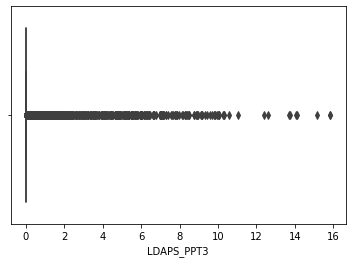

In [60]:
sns.boxplot(df['LDAPS_PPT3'])

LDAPS_PPT3 has large amount of outlier presence in the data

<AxesSubplot:xlabel='LDAPS_PPT4'>

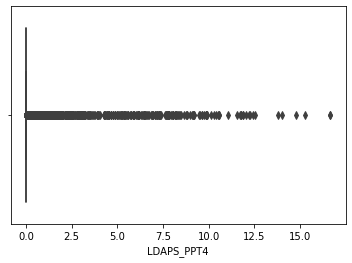

In [61]:
sns.boxplot(df['LDAPS_PPT4'])

LDAPS_PPT4 also has many outliers in the data

<AxesSubplot:xlabel='lat'>

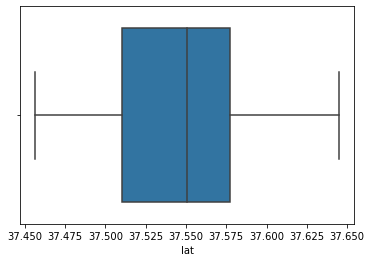

In [62]:
sns.boxplot(df['lat'])

lat column has no outliers in the data

<AxesSubplot:xlabel='lon'>

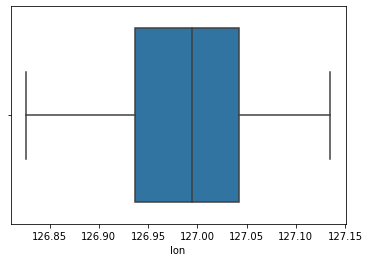

In [63]:
sns.boxplot(df['lon'])

lon column also has no outliers in column

<AxesSubplot:xlabel='DEM'>

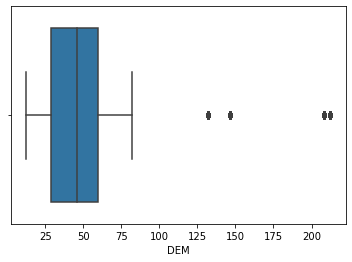

In [64]:
sns.boxplot(df['DEM'])

DEM column has outlier presence in the data

<AxesSubplot:xlabel='Slope'>

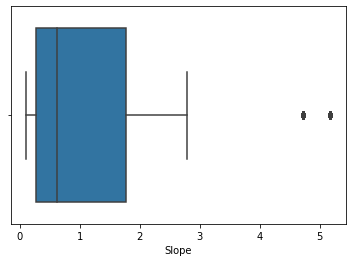

In [65]:
sns.boxplot(df['Slope'])

slope has some outliers in the dataset

<AxesSubplot:xlabel='Solar radiation'>

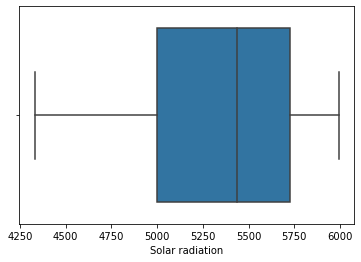

In [68]:
sns.boxplot(df['Solar radiation'])

solar radiation has no outlier presence

<AxesSubplot:xlabel='Next_Tmin'>

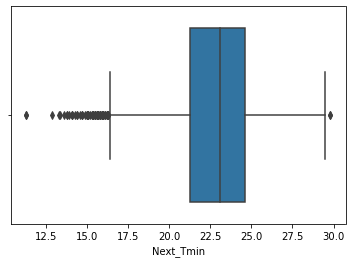

In [67]:
sns.boxplot(df['Next_Tmin'])

Next_Tmin also has outlier presence in data

WE HAVE TO TREAT THE OUTLIERS LATER

# DATA PREPROCESSING

In [69]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

ALL DATAS ARE IN FLOAT TYPE SO NO NEED TO ENCODE IT

# TREATING NULL VALUES

ALL COLUMNS ARE Float dtypes,so want to replace null with mean values

mannually dropping date column

In [71]:
df.drop(['Date'],axis=1,inplace=True)

In [73]:
df.drop(['station'],axis=1,inplace=True)

In [74]:
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [75]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [76]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [77]:
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

In [78]:
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

In [79]:
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [80]:
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

In [81]:
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

In [82]:
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

In [83]:
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

In [84]:
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

In [85]:
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

In [86]:
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

In [87]:
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

In [88]:
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

In [89]:
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

In [90]:
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

In [91]:
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [92]:
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [93]:
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [94]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

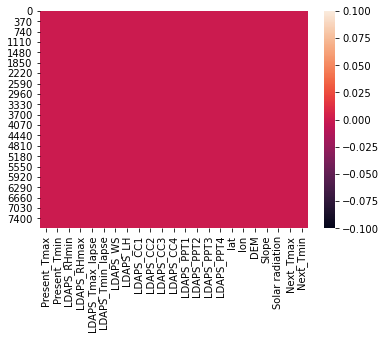

In [95]:
sns.heatmap(df.isnull())

# TREATING OUTLIERS

FROM BOXPLOT ANALYSIS IT IS CLEAR THAT SOME COLUMNS HAVE OUTLIER PRESENCE

In [98]:
df.shape

(7752, 23)

In [99]:
from scipy.stats import zscore

In [100]:
z=np.abs(zscore(df))

In [101]:
new_df=df[(z<3).all(axis=1)]

In [102]:
new_df.shape

(6894, 23)

LOSS IS VERY LESS SO WE CAN PROCEED

# CORRELATION AND HEATMAP

In [103]:
cor=new_df.corr()

In [104]:
cor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.612869,-0.151799,-0.295184,0.534696,0.609642,-0.104222,0.129469,-0.286673,-0.155984,...,-0.037113,-0.012032,-0.038329,-0.050398,0.011214,-0.168532,-0.091561,-0.064734,0.586403,0.616843
Present_Tmin,0.612869,1.000000,0.150633,-0.038516,0.434144,0.752887,0.019815,-0.003840,0.090553,0.117494,...,0.087087,0.041499,-0.047673,-0.071014,-0.043494,-0.239765,-0.137911,0.011582,0.446660,0.785261
LDAPS_RHmin,-0.151799,0.150633,1.000000,0.552690,-0.555284,0.131633,0.240804,-0.037860,0.575977,0.714711,...,0.378324,0.261354,0.185773,0.088642,-0.094266,0.095774,0.119976,0.251406,-0.428028,0.133571
LDAPS_RHmax,-0.295184,-0.038516,0.552690,1.000000,-0.386650,-0.140126,0.097805,0.271313,0.411650,0.362241,...,0.227141,0.120047,0.105881,0.198806,0.016957,0.172592,0.218423,0.154352,-0.300434,-0.096533
LDAPS_Tmax_lapse,0.534696,0.434144,-0.555284,-0.386650,1.000000,0.620262,-0.232181,0.037524,-0.417050,-0.494336,...,-0.242213,-0.143261,-0.160780,-0.036545,0.103314,-0.163030,-0.149906,0.012626,0.805676,0.547000
LDAPS_Tmin_lapse,0.609642,0.752887,0.131633,-0.140126,0.620262,1.000000,-0.052768,-0.134505,0.038241,0.101757,...,0.008682,0.011985,-0.080987,-0.088591,-0.028678,-0.177581,-0.173000,0.107649,0.538722,0.867095
LDAPS_WS,-0.104222,0.019815,0.240804,0.097805,-0.232181,-0.052768,1.000000,-0.046063,0.262525,0.224522,...,0.118174,0.128641,0.197393,-0.014222,-0.075586,0.153256,0.120189,0.134556,-0.275316,-0.012735
LDAPS_LH,0.129469,-0.003840,-0.037860,0.271313,0.037524,-0.134505,-0.046063,1.000000,-0.144830,-0.258271,...,-0.068520,0.010293,0.038315,0.122850,0.021891,0.064055,0.097418,-0.036532,0.172888,-0.045762
LDAPS_CC1,-0.286673,0.090553,0.575977,0.411650,-0.417050,0.038241,0.262525,-0.144830,1.000000,0.759678,...,0.394688,0.194218,0.196659,-0.006864,-0.013743,-0.026628,-0.033004,0.242596,-0.447965,0.009312
LDAPS_CC2,-0.155984,0.117494,0.714711,0.362241,-0.494336,0.101757,0.224522,-0.258271,0.759678,1.000000,...,0.480103,0.250074,0.188960,-0.003749,-0.013838,-0.024019,-0.029514,0.186684,-0.478533,0.078341


ABOVE TABLE GIVES THE DETAILS OF CORRELATION AMONG COLUMNS, HEAT MAP PLOT WILL CONVEY THIS MORE

<AxesSubplot:>

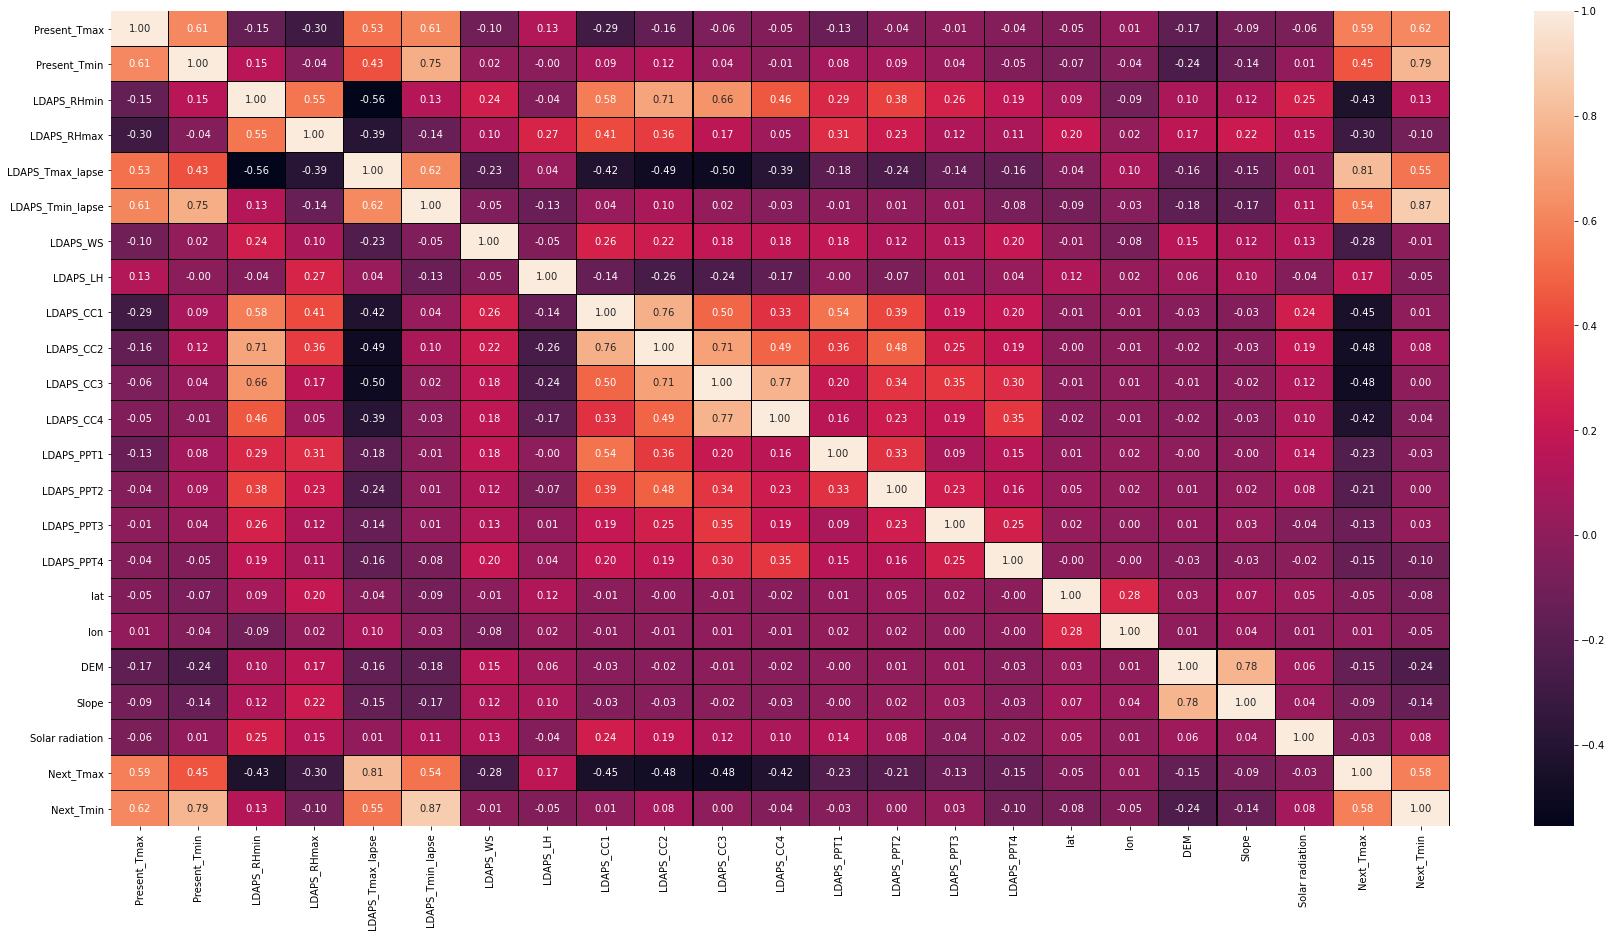

In [105]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

HEAT MAP CONVEYS THE CORRELATION STATUS OF EACH COLUMN

TO GET THE DETAILS OF TARGET DEPENDENCY WE HAVE TO PLOT 

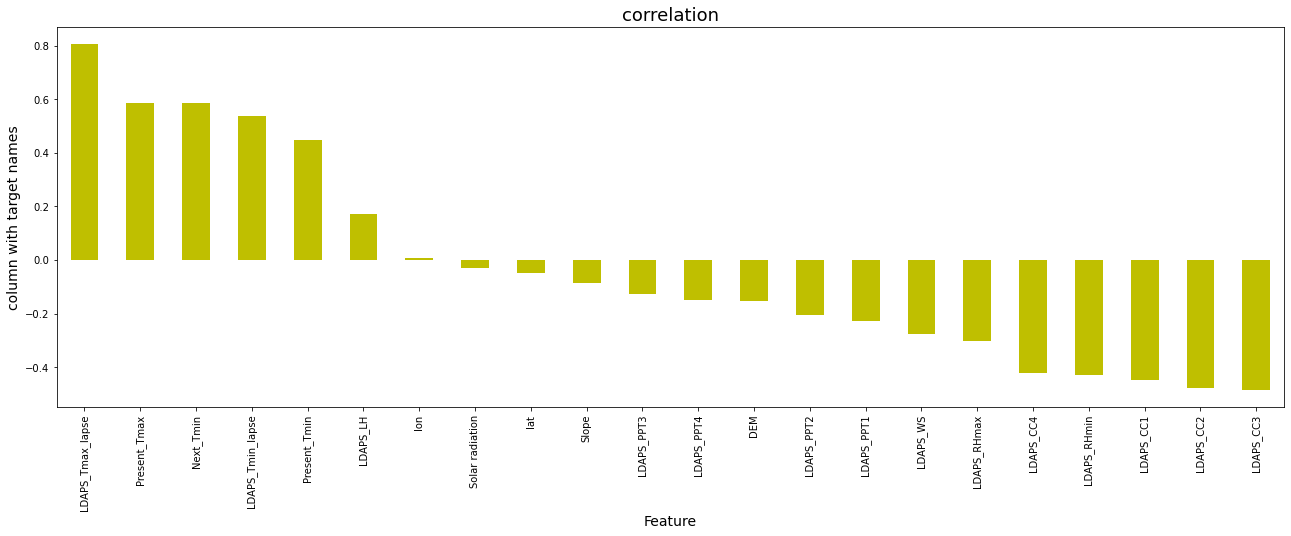

In [106]:
plt.figure(figsize=(22,7))
cor['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we have to drop mannually some negativeley correlated columns

In [107]:
new_df.drop(['LDAPS_CC1'],axis=1,inplace=True)
new_df.drop(['LDAPS_CC2'],axis=1,inplace=True)
new_df.drop(['LDAPS_CC3'],axis=1,inplace=True)
new_df.drop(['LDAPS_CC4'],axis=1,inplace=True)
new_df.drop(['LDAPS_RHmin'],axis=1,inplace=True)
new_df.drop(['LDAPS_RHmax'],axis=1,inplace=True)

# SKEWNESS REMOVAL

In [108]:
new_df.skew()

Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

SKEWNESS IS PRESENT IN SOME COLUMNS

SOME CCOLUMNS HAVE SKEWNESS PRESENCE ,HISTOGRAM CLEARLEY CONVEYS THIS

<AxesSubplot:ylabel='Frequency'>

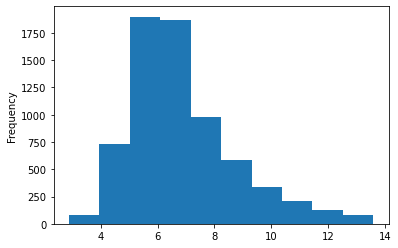

In [117]:
new_df['LDAPS_WS'].plot.hist()

LDAPS_WS HAS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

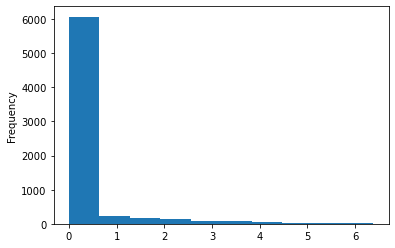

In [118]:
new_df['LDAPS_PPT1'].plot.hist()

COLUMN LDAPS_PPT1 SURELEY HAVE SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

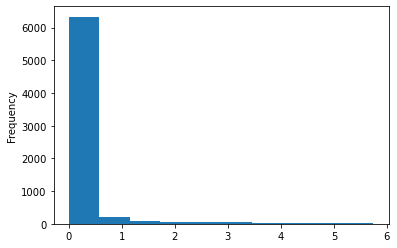

In [119]:
new_df['LDAPS_PPT2'].plot.hist()

LDAPS_PPT2 HAS SKEWNESS

<AxesSubplot:ylabel='Frequency'>

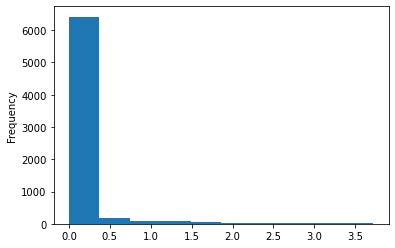

In [120]:
new_df['LDAPS_PPT3'].plot.hist()

LDAPS_PPT3 HAS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

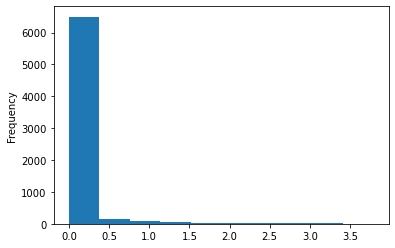

In [121]:
new_df['LDAPS_PPT4'].plot.hist()

THE COLUMN LDAPS_PPT4 HAS SKEWNESS

<AxesSubplot:ylabel='Frequency'>

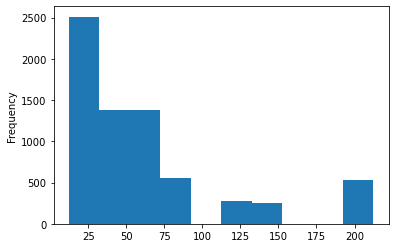

In [122]:
new_df['DEM'].plot.hist()

DEM HAS SKEWNESS

<AxesSubplot:ylabel='Frequency'>

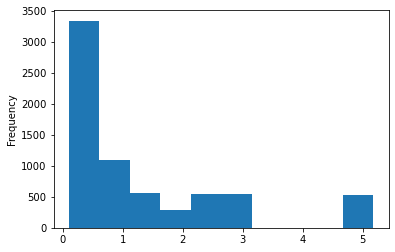

In [123]:
new_df['Slope'].plot.hist()

Slope COLUMN HAS SKEWNESS IN DATA

# splitting X AND Y AND APPLYING POWER TRANSFORM

In [124]:
x=new_df.drop("Next_Tmax",axis=1)
y=new_df["Next_Tmax"]

In [125]:
x.shape

(6894, 16)

In [126]:
y.shape

(6894,)

In [127]:
x

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,28.7,21.4,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,31.9,21.6,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,31.6,23.3,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,32.0,23.4,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,31.4,21.9,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,27.812697,18.303014,6.603253,9.614074,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,17.7
7746,22.5,17.4,26.704905,17.814038,5.768083,82.146707,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,17.1
7747,23.3,17.1,26.352081,18.775678,6.148918,72.058294,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,18.1
7748,23.3,17.7,27.010193,18.733519,6.542819,47.241457,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,18.8


In [128]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6894, dtype: float64

In [129]:
from sklearn.preprocessing import PowerTransformer

In [130]:
pt=PowerTransformer(method="yeo-johnson")

In [131]:
X_power=pt.fit_transform(x)

In [132]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [133]:
df1.skew()

Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmin          -0.021823
dtype: float64

still skewness is there in some columns we have to apply sqrt

In [134]:
df1["LDAPS_PPT1"]=np.sqrt(df1["LDAPS_PPT1"])
df1["LDAPS_PPT2"]=np.sqrt(df1["LDAPS_PPT2"])
df1["LDAPS_PPT3"]=np.sqrt(df1["LDAPS_PPT3"])
df1["LDAPS_PPT4"]=np.sqrt(df1["LDAPS_PPT4"])

In [135]:
df1.skew()

Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_PPT1         -1.524644
LDAPS_PPT2         -1.497195
LDAPS_PPT3         -1.160384
LDAPS_PPT4         -1.256857
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmin          -0.021823
dtype: float64

WE HAVE DROP THOSE COLUMNS

In [136]:
df1.drop(['LDAPS_PPT1'],axis=1,inplace=True)
df1.drop(['LDAPS_PPT2'],axis=1,inplace=True)
df1.drop(['LDAPS_PPT3'],axis=1,inplace=True)
df1.drop(['LDAPS_PPT4'],axis=1,inplace=True)

In [137]:
df1.skew()

Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmin          -0.021823
dtype: float64

skewness removed successfully

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [144]:
vif_calc()

       VIF Factor          Features
0      232.151868      Present_Tmax
1      329.853880      Present_Tmin
2      253.339843  LDAPS_Tmax_lapse
3      670.731827  LDAPS_Tmin_lapse
4       17.761984          LDAPS_WS
5        5.206067          LDAPS_LH
6        1.381455        LDAPS_PPT1
7        1.373013        LDAPS_PPT2
8        1.221294        LDAPS_PPT3
9        1.220580        LDAPS_PPT4
10  609599.623224               lat
11  610366.615944               lon
12       6.822121               DEM
13       5.119199             Slope
14     178.211870   Solar radiation
15     515.119301         Next_Tmin


we have to drop some columns 

In [145]:
df1.drop(['lat'],axis=1,inplace=True)
df1.drop(['lon'],axis=1,inplace=True)

# SCALING FEATURES

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
sc=StandardScaler()

In [148]:
x=sc.fit_transform(x)

# SPLITTING AND APPLYING ALGORITHMS

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [151]:
x_train.shape

(4825, 16)

In [152]:
x_test.shape

(2069, 16)

In [153]:
y_train.shape

(4825,)

In [154]:
y_test.shape

(2069,)

# LINEAR REGRESSION

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [157]:
lm=LinearRegression()

In [158]:
lm.fit(x_train,y_train)

LinearRegression()

In [159]:
pred=lm.predict(x_test)

In [160]:
print(pred)

[34.69746016 25.39814931 25.78660774 ... 27.93830367 31.53978007
 31.74816724]


# ERROR CALCULATIONS

In [161]:
print("mean absolute error:",mean_absolute_error(y_test,pred))

mean absolute error: 1.1416326124831468


In [162]:
print("mean squred error:",mean_squared_error(y_test,pred))

mean squred error: 2.175319492797792


In [163]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

root mean squared error: 1.4748964346006779


# r2 score

In [164]:
from sklearn.metrics import r2_score

In [165]:
lmscore=r2_score(y_test,pred)

In [166]:
print(lmscore)

0.7497625622442905


# SUPPORT VECTOR REGRESSOR

In [167]:
from sklearn.svm import SVR

In [168]:
svr=SVR(kernel="linear")

In [169]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [170]:
svrpred=svr.predict(x_test)

In [171]:
print(svrpred)

[34.616131   25.74574545 25.73491789 ... 28.30974915 31.65529737
 31.97213962]


# ERROR CALCULATIONS

In [172]:
print("mean absolute error:",mean_absolute_error(y_test,svrpred))

mean absolute error: 1.1299773467545646


In [173]:
print("mean squred error:",mean_squared_error(y_test,svrpred))

mean squred error: 2.1937322400214008


In [174]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,svrpred)))

root mean squared error: 1.4811253289378994


# R2 SCORE

In [175]:
svrscore=r2_score(y_test,svrpred)

In [176]:
print(svrscore)

0.7476444555925851


# DECISION TREE REGRESSOR

In [177]:
from sklearn.tree import DecisionTreeRegressor

In [178]:
dtr=DecisionTreeRegressor()

In [179]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [180]:
dtrpred=dtr.predict(x_test)

In [181]:
print(dtrpred)

[34.3 26.7 27.  ... 30.8 32.5 31.4]


# ERROR VALUES

In [182]:
print("mean absolute error:",mean_absolute_error(y_test,dtrpred))

mean absolute error: 1.206041346991574


In [183]:
print("mean squred error:",mean_squared_error(y_test,dtrpred))

mean squred error: 2.743614597839742


In [184]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,dtrpred)))

root mean squared error: 1.6563860050844859


# R2 SCORE

In [185]:
dtrscore=r2_score(y_test,dtrpred)

In [186]:
print(dtrscore)

0.6843888498100277


# K-neighbor regressor

In [187]:
from sklearn.neighbors import KNeighborsRegressor

In [188]:
knnr=KNeighborsRegressor()

In [189]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [190]:
knnrpred=knnr.predict(x_test)

In [191]:
print(knnrpred)

[32.82 27.18 25.64 ... 26.54 31.98 31.32]


# ERROR CALCULATION

In [192]:
print("mean absolute error:",mean_absolute_error(y_test,knnrpred))

mean absolute error: 1.0669937824660851


In [193]:
print("mean squred error:",mean_squared_error(y_test,knnrpred))

mean squred error: 1.943831852343629


In [194]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,knnrpred)))

root mean squared error: 1.3942137039721096


# R2 SCORE

In [195]:
knnrscore=r2_score(y_test,knnrpred)

In [196]:
print(knnrscore)

0.7763916961306705


# CROSS VALIDATION MEAN SCORE

In [197]:
from sklearn.model_selection import cross_val_score

In [198]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.690537013931894


In [199]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.6905560449108953


In [200]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.40717707018203714


In [201]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.5608539121121865


# SELECTING LINEAR REGRESSOR FOR FURTHER PROCEEDINGS

# HYPER PARAMETER TUNING:LINEAR REGRESSOR

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
parameter={'fit_intercept':['bool'],
          'normalize':['bool'],
          'copy_X':['bool'],
          'n_jobs':[1,2,3]}

In [204]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [205]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['bool'], 'fit_intercept': ['bool'],
                         'n_jobs': [1, 2, 3], 'normalize': ['bool']})

In [206]:
GCV.best_params_

{'copy_X': 'bool', 'fit_intercept': 'bool', 'n_jobs': 1, 'normalize': 'bool'}

# PASSING BEST PARAMETERS TO MODEL

In [207]:
Maxtemperature_model=LinearRegression(copy_X='bool',
 fit_intercept='bool',
 n_jobs=1,
 normalize='bool')

In [208]:
Maxtemperature_model.fit(x_train,y_train)

LinearRegression(copy_X='bool', fit_intercept='bool', n_jobs=1,
                 normalize='bool')

In [209]:
Finalpred=Maxtemperature_model.predict(x_test)

In [210]:
Finalr2score=r2_score(y_test,Finalpred)

In [211]:
print(Finalr2score)

0.7497625622442905


got r2score value 75%

# saving and conclusion of model

In [212]:
Finalconclusion=pd.DataFrame([Maxtemperature_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [213]:
Finalconclusion

,0,1,2,3,4,5,6,7,8,9,...,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068
Predicted,34.69746,25.398149,25.786608,31.644572,35.518828,34.604918,31.202018,29.748043,32.768792,34.34185,...,33.282561,25.286218,25.220416,30.995929,28.752013,28.044914,32.324923,27.938304,31.53978,31.748167
Orginal,34.69746,25.398149,25.786608,31.644572,35.518828,34.604918,31.202018,29.748043,32.768792,34.34185,...,33.282561,25.286218,25.220416,30.995929,28.752013,28.044914,32.324923,27.938304,31.53978,31.748167


# SAVING

In [214]:
import joblib

In [215]:
joblib.dump(Maxtemperature_model,"Maxtemperature_model.obj")

['Maxtemperature_model.obj']

# Temperature project : target-Next_Tmin

In [ ]:
we already did the initial analysis and for this particular target we are using this data

In [216]:
new_df

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,27.812697,18.303014,6.603253,9.614074,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,26.704905,17.814038,5.768083,82.146707,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.352081,18.775678,6.148918,72.058294,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,27.010193,18.733519,6.542819,47.241457,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# CORRELATION AND HEATMAP

In [217]:
corr=new_df.corr()

In [218]:
corr

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.612869,0.534696,0.609642,-0.104222,0.129469,-0.132682,-0.037113,-0.012032,-0.038329,-0.050398,0.011214,-0.168532,-0.091561,-0.064734,0.586403,0.616843
Present_Tmin,0.612869,1.000000,0.434144,0.752887,0.019815,-0.003840,0.076042,0.087087,0.041499,-0.047673,-0.071014,-0.043494,-0.239765,-0.137911,0.011582,0.446660,0.785261
LDAPS_Tmax_lapse,0.534696,0.434144,1.000000,0.620262,-0.232181,0.037524,-0.183791,-0.242213,-0.143261,-0.160780,-0.036545,0.103314,-0.163030,-0.149906,0.012626,0.805676,0.547000
LDAPS_Tmin_lapse,0.609642,0.752887,0.620262,1.000000,-0.052768,-0.134505,-0.010559,0.008682,0.011985,-0.080987,-0.088591,-0.028678,-0.177581,-0.173000,0.107649,0.538722,0.867095
LDAPS_WS,-0.104222,0.019815,-0.232181,-0.052768,1.000000,-0.046063,0.184406,0.118174,0.128641,0.197393,-0.014222,-0.075586,0.153256,0.120189,0.134556,-0.275316,-0.012735
LDAPS_LH,0.129469,-0.003840,0.037524,-0.134505,-0.046063,1.000000,-0.001071,-0.068520,0.010293,0.038315,0.122850,0.021891,0.064055,0.097418,-0.036532,0.172888,-0.045762
LDAPS_PPT1,-0.132682,0.076042,-0.183791,-0.010559,0.184406,-0.001071,1.000000,0.331360,0.094954,0.150353,0.013353,0.019159,-0.001862,-0.001613,0.137842,-0.226178,-0.027855
LDAPS_PPT2,-0.037113,0.087087,-0.242213,0.008682,0.118174,-0.068520,0.331360,1.000000,0.234563,0.158154,0.045566,0.021741,0.008907,0.020220,0.082339,-0.205623,0.004712
LDAPS_PPT3,-0.012032,0.041499,-0.143261,0.011985,0.128641,0.010293,0.094954,0.234563,1.000000,0.249742,0.022268,0.003620,0.013927,0.027948,-0.042266,-0.126409,0.025644
LDAPS_PPT4,-0.038329,-0.047673,-0.160780,-0.080987,0.197393,0.038315,0.150353,0.158154,0.249742,1.000000,-0.003433,-0.002315,-0.028201,-0.025119,-0.020079,-0.147645,-0.100543


<AxesSubplot:>

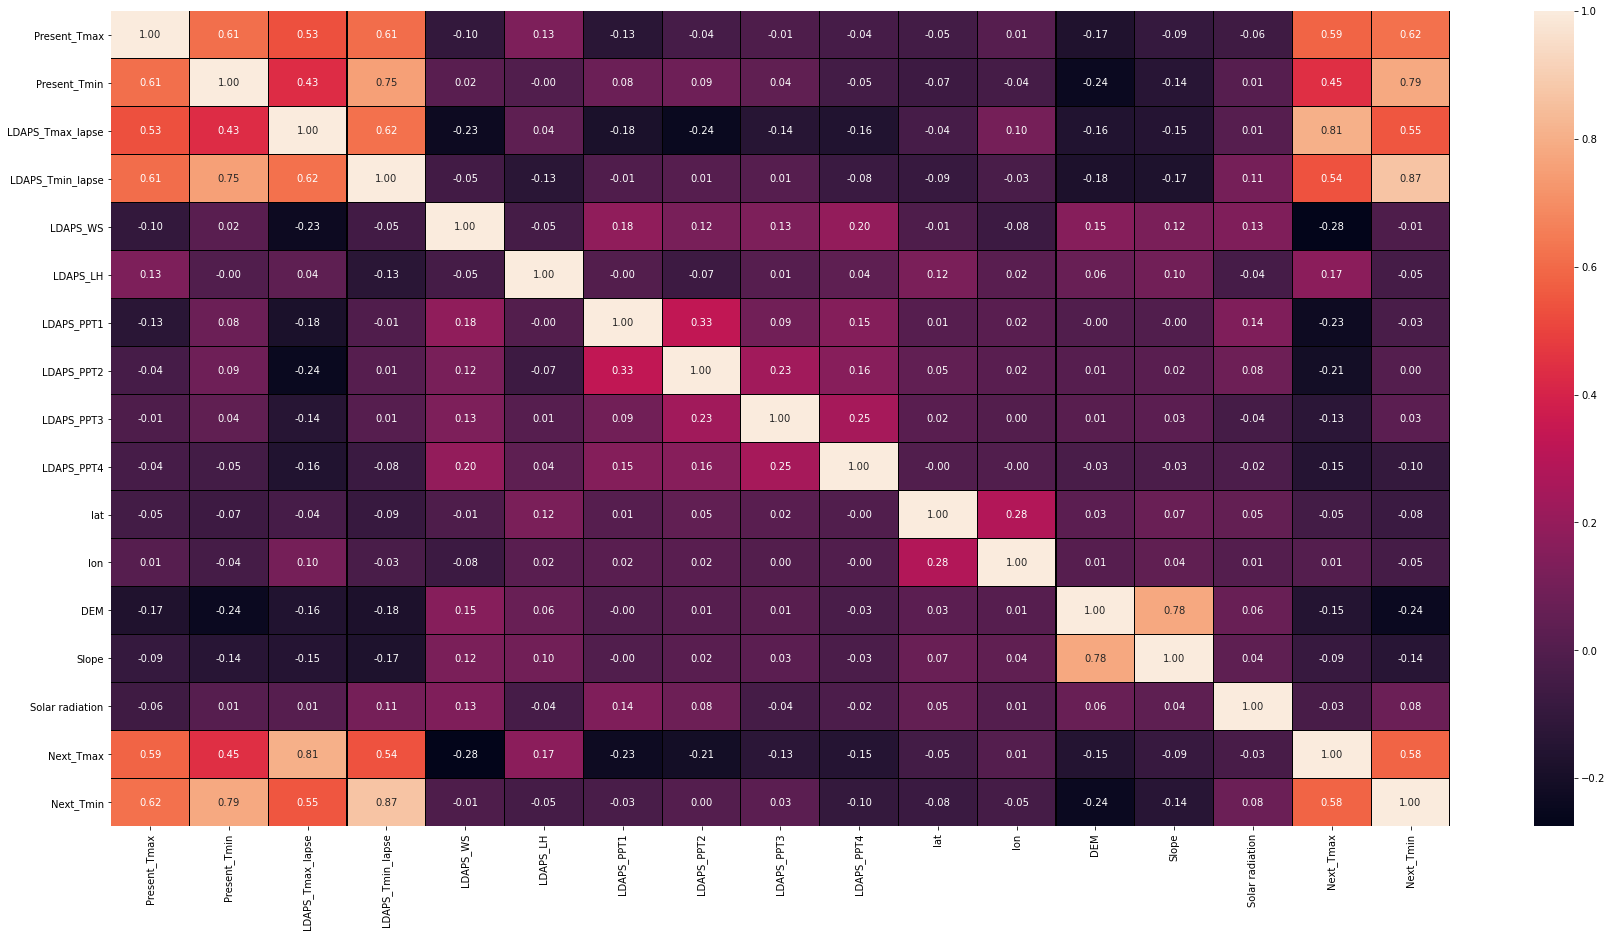

In [219]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

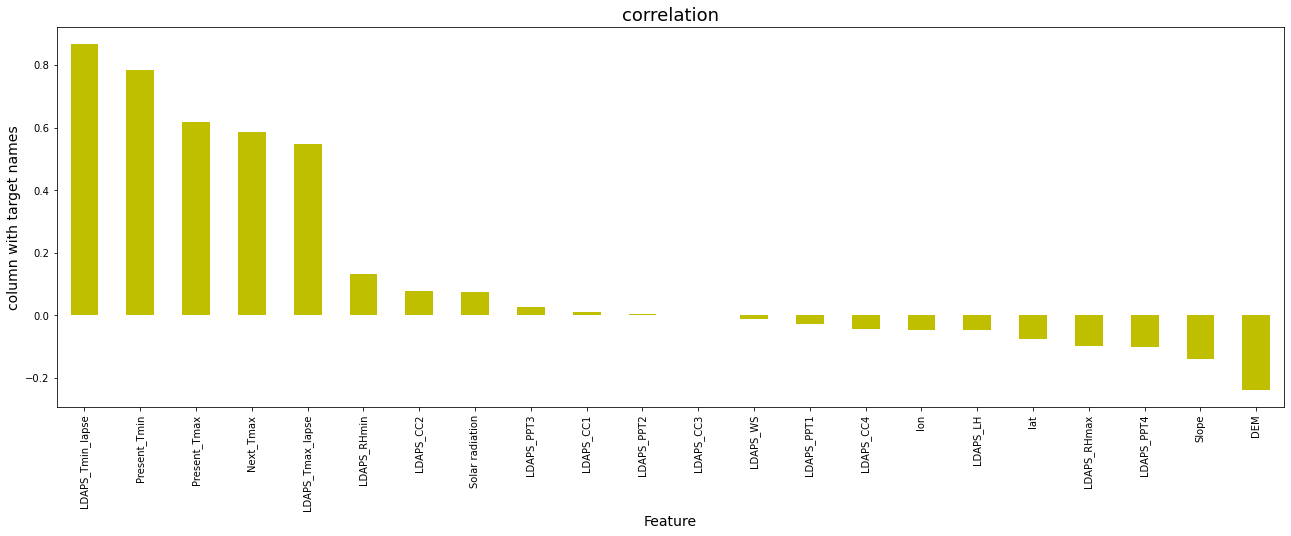

In [220]:
plt.figure(figsize=(22,7))
cor['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# SKEWNESS REMOVAL

In [221]:
new_df.skew()

Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

# splitting X AND Y AND APPLYING POWER TRANSFORM

In [222]:
x1=new_df.drop("Next_Tmin",axis=1)
y1=new_df["Next_Tmin"]

In [223]:
x1.shape

(6894, 16)

In [224]:
y1.shape

(6894,)

In [225]:
x1

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,27.812697,18.303014,6.603253,9.614074,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6
7746,22.5,17.4,26.704905,17.814038,5.768083,82.146707,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0
7747,23.3,17.1,26.352081,18.775678,6.148918,72.058294,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3
7748,23.3,17.7,27.010193,18.733519,6.542819,47.241457,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6


In [226]:
y1

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6894, dtype: float64

In [227]:
from sklearn.preprocessing import PowerTransformer

In [228]:
pt=PowerTransformer(method="yeo-johnson")

In [229]:
X_power=pt.fit_transform(x1)

In [230]:
df2=pd.DataFrame(X_power,columns=x1.columns)

In [231]:
df2.skew()

Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmax          -0.035691
dtype: float64

some columns still have skewnes

In [232]:
df2["LDAPS_PPT1"]=np.sqrt(df2["LDAPS_PPT1"])
df2["LDAPS_PPT2"]=np.sqrt(df2["LDAPS_PPT2"])
df2["LDAPS_PPT3"]=np.sqrt(df2["LDAPS_PPT3"])
df2["LDAPS_PPT4"]=np.sqrt(df2["LDAPS_PPT4"])

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [233]:
def vif_calculator():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

In [234]:
vif_calculator()

       VIF Factor          Features
0      240.167518      Present_Tmax
1      299.449320      Present_Tmin
2      433.828123  LDAPS_Tmax_lapse
3      415.432468  LDAPS_Tmin_lapse
4       17.987033          LDAPS_WS
5        5.398965          LDAPS_LH
6        1.394445        LDAPS_PPT1
7        1.372313        LDAPS_PPT2
8        1.220542        LDAPS_PPT3
9        1.209915        LDAPS_PPT4
10  609624.964813               lat
11  610376.281766               lon
12       6.476508               DEM
13       4.979498             Slope
14     178.058037   Solar radiation
15     385.493259         Next_Tmax


lat and lon have high vif values so dropping those columns

In [235]:
df2.drop(['lat'],axis=1,inplace=True)
df2.drop(['lon'],axis=1,inplace=True)

# SCALING FEATURES

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
sc=StandardScaler()

In [238]:
x1=sc.fit_transform(x1)

# SPLITTING AND APPLYING ALGORITHMS

In [239]:
from sklearn.model_selection import train_test_split

In [246]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=45)

In [248]:
x1_train.shape

(4825, 16)

In [249]:
x1_test.shape

(2069, 16)

In [250]:
y1_test.shape

(2069,)

In [251]:
y1_train.shape

(4825,)

# LINEAR REGRESSION

In [252]:
lm.fit(x1_train,y1_train)

LinearRegression()

In [253]:
pred1=lm.predict(x1_test)

In [254]:
print(pred1)

[24.52213534 20.75589054 19.50566585 ... 21.26374459 21.35527319
 21.29332499]


# ERROR CALCULATIONS

In [255]:
print("mean absolute error:",mean_absolute_error(y1_test,pred1))

mean absolute error: 0.7694346591342897


In [256]:
print("mean squred error:",mean_squared_error(y1_test,pred1))

mean squred error: 0.9384407532710302


In [257]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred1)))

root mean squared error: 0.9687315176409974


# r2 score

In [258]:
lmscore1=r2_score(y1_test,pred1)

In [259]:
print(lmscore1)

0.8359057033333885


# SUPPORT VECTOR REGRESSOR

In [260]:
svr.fit(x1_train,y1_train)

SVR(kernel='linear')

In [261]:
svrpred1=svr.predict(x1_test)

In [262]:
print(svrpred1)

[24.51627879 20.86858971 19.60801609 ... 21.42661886 21.33801093
 21.27022286]


# ERROR CALCULATIONS

In [263]:
print("mean absolute error:",mean_absolute_error(y1_test,svrpred1))

mean absolute error: 0.762908688131128


In [264]:
print("mean squred error:",mean_squared_error(y1_test,svrpred1))

mean squred error: 0.9403276472079506


In [265]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,svrpred1)))

root mean squared error: 0.9697049279074282


# R2 SCORE

In [266]:
svrscore1=r2_score(y1_test,svrpred1)

In [267]:
print(svrscore1)

0.8355757639819865


# DECISION TREE REGRESSOR

In [268]:
dtr.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [269]:
dtrpred1=dtr.predict(x1_test)

In [270]:
print(dtrpred1)

[26.  22.  20.4 ... 22.7 20.4 22.4]


# ERROR VALUES

In [271]:
print("mean absolute error:",mean_absolute_error(y1_test,dtrpred1))

mean absolute error: 0.854472373033265


In [272]:
print("mean squred error:",mean_squared_error(y1_test,dtrpred1))

mean squred error: 1.332493859805115


In [273]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,dtrpred1)))

root mean squared error: 1.1543369784448192


# R2 SCORE

In [274]:
dtrscore1=r2_score(y1_test,dtrpred1)

In [275]:
print(dtrscore1)

0.7670021874314858


# K-neighbor regressor

In [276]:
knnr.fit(x1_train,y1_train)

KNeighborsRegressor()

In [277]:
knnrpred1=knnr.predict(x1_test)

In [278]:
print(knnrpred1)

[24.62 20.58 19.76 ... 20.68 20.82 21.46]


# ERROR CALCULATION

In [279]:
print("mean absolute error:",mean_absolute_error(y1_test,knnrpred1))

mean absolute error: 0.7296836925425569


In [280]:
print("mean squred error:",mean_squared_error(y1_test,knnrpred1))

mean squred error: 0.9162079058583872


In [281]:
print("root mean squared error:",np.sqrt(mean_squared_error(y1_test,knnrpred1)))

root mean squared error: 0.9571874977549525


# R2 SCORE

In [282]:
knnrscore1=r2_score(y1_test,knnrpred1)

In [283]:
print(knnrscore1)

0.8397933045978874


# CROSS VALIDATION MEAN SCORE

In [284]:
print(cross_val_score(lm,x1,y1,cv=5).mean())

0.7870426681371157


In [285]:
print(cross_val_score(svr,x1,y1,cv=5).mean())

0.7811874211472609


In [286]:
print(cross_val_score(dtr,x1,y1,cv=5).mean())

0.602359683656483


In [287]:
print(cross_val_score(knnr,x1,y1,cv=5).mean())

0.6804283282568742


# PREFERING LINEAR REGRESSOR FOR FURTHER PROCEEDINGS

# HYPER PARAMETER TUNING:LINEAR REGRESSOR

In [288]:
parameter={'fit_intercept':['bool'],
          'normalize':['bool'],
          'copy_X':['bool'],
          'n_jobs':[1,2,3]}

In [289]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [290]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['bool'], 'fit_intercept': ['bool'],
                         'n_jobs': [1, 2, 3], 'normalize': ['bool']})

In [291]:
GCV.best_params_

{'copy_X': 'bool', 'fit_intercept': 'bool', 'n_jobs': 1, 'normalize': 'bool'}

PASSING BEST PARAMETERS TO MODEL

In [293]:
MINtemperature_model=LinearRegression(copy_X='bool',
 fit_intercept='bool',
 n_jobs=1,
 normalize='bool')

In [294]:
MINtemperature_model.fit(x1_train,y1_train)

LinearRegression(copy_X='bool', fit_intercept='bool', n_jobs=1,
                 normalize='bool')

In [295]:
Finalpred=MINtemperature_model.predict(x1_test)

In [296]:
Finalr2score=r2_score(y1_test,Finalpred)

In [297]:
print(Finalr2score)

0.8359057033333885


83.5% R2 SCORE

# saving and conclusion of model

In [298]:
MINTEMPconclusion=pd.DataFrame([MINtemperature_model.predict(x1_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [299]:
MINTEMPconclusion

,0,1,2,3,4,5,6,7,8,9,...,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068
Predicted,24.522135,20.755891,19.505666,21.483915,26.086921,24.722043,21.310552,25.564036,24.400509,27.509723,...,23.777331,19.812641,17.19214,23.820251,25.338002,23.882791,26.644757,21.263745,21.355273,21.293325
Orginal,24.522135,20.755891,19.505666,21.483915,26.086921,24.722043,21.310552,25.564036,24.400509,27.509723,...,23.777331,19.812641,17.19214,23.820251,25.338002,23.882791,26.644757,21.263745,21.355273,21.293325


# SAVING

In [300]:
import joblib

In [301]:
joblib.dump(MINtemperature_model,"MINtemperature_model.obj")

['MINtemperature_model.obj']